2.1 K-means clustering

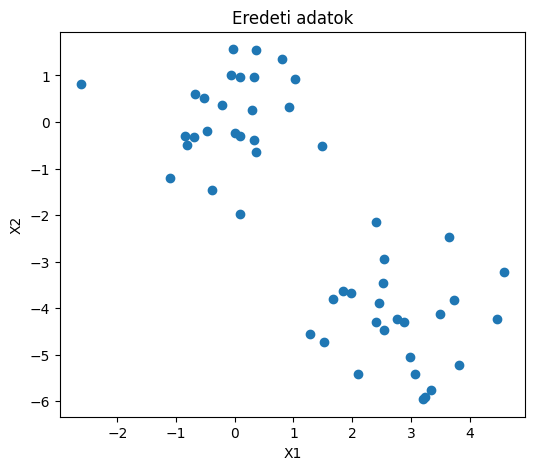

Cluster címkék: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centroidok: [[-0.09155989  0.12712163]
 [ 2.82020863 -4.27115644]]


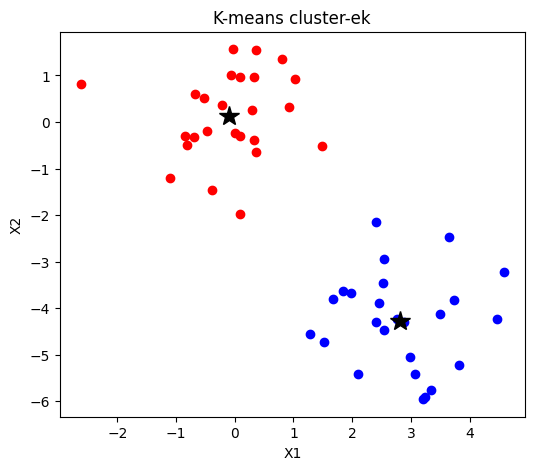

In [2]:
# 1. Importálás
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 2. Adatok létrehozása
np.random.seed(42)  # reprodukálhatóság miatt
X = np.random.randn(50, 2)
X[0:25, 0] += 3
X[0:25, 1] -= 4

# 3. Eredeti adatok plotolása
plt.figure(figsize=(6,5))
plt.plot(X[:, 0], X[:, 1], "o")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Eredeti adatok")
plt.show()

# 4. K-means clustering K=2
kmeans = KMeans(n_clusters=2, random_state=100).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster címkék:", labels)
print("Centroidok:", centroids)

# 5. Cluster-ek plotolása színezéssel
plt.figure(figsize=(6,5))
for i in range(X.shape[0]):
    if labels[i] == 0:
        plt.plot(X[i, 0], X[i, 1], "o", color="red")
    else:
        plt.plot(X[i, 0], X[i, 1], "o", color="blue")

plt.plot(centroids[0][0], centroids[0][1], "*", color="black", markersize=15)
plt.plot(centroids[1][0], centroids[1][1], "*", color="black", markersize=15)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("K-means cluster-ek")
plt.show()


## K-means clustering - Gyakorlati példa

- **Adatok**: 50 megfigyelés, 2 változó, az első 25 megfigyelés eltolással a két klaszter elkülönítéséhez.
- **Folyamat**:
  1. Adatok generálása normál eloszlásból.
  2. Az első 25 megfigyelés X1 értékeit +3-mal, X2 értékeit -4-gyel módosítjuk.
  3. Az adatok scatter plot-on való megjelenítése.
  4. K-means klaszterezés K=2-vel (`sklearn.cluster.KMeans`).
  5. A klasztercímkék és centroidok kiíratása.
  6. A klaszterek színezett scatter plot-on való ábrázolása.

- **Eredmény**: Két jól elkülönülő klasztert kaptunk, a centroidok a klaszterek közepén helyezkednek el.


In [3]:
# (c) Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset from the specified path
Live = pd.read_csv("data/lab4-alldata/Live_20210128.csv")

# Drop the last 4 empty columns (üres oszlopok eltávolítása)
Live = Live.iloc[:, :-4]

# Check shape of the dataframe
print("Number of observations (sorok):", Live.shape[0])
print("Number of variables (változók):", Live.shape[1])

# Display first few rows
print(Live.head())

# (d) Descriptive statistics (leíró statisztika)
print(Live.describe())  # shows mean, std, min, max, etc.

# Observation: Variables have very different ranges (különböző nagyságrend)
# e.g., num_likes may be in hundreds, num_shares in single digits
# Therefore scaling is necessary for K-means clustering

# (e) Select 5 features for clustering (változó kiválasztás)
features = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves"]
Live_features = Live[features]

# Scale the data using StandardScaler (skálázás)
scaler = StandardScaler()
Live_scaled = scaler.fit_transform(Live_features)

# Optional: convert back to DataFrame for easier handling
Live_scaled = pd.DataFrame(Live_scaled, columns=features)
print(Live_scaled.head())


Number of observations (sorok): 7050
Number of variables (változók): 12
   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0         262        432         92         3          1         1           0  
1           0        150          0         0          0         0           0  
2          57        204         21         1          1         0           0  
3           0        111          0         0          0         0           0  
4           0        204          9         0          0         0           0

# K-means Clustering with Real Data – Facebook Posts

## (c) Importing the dataset and understanding it

- **Dataset (adatbázis / adathalmaz):**
  - File: `Live_20210128.csv`
  - Contains Facebook posts from 10 Thai fashion and cosmetics sellers.
  - Each row (observation / megfigyelés) represents a post of different types: video, photo, status, or link.
  - Columns (features / változók) describe each post: `date`, `num_reactions`, `num_comments`, `num_likes`, `num_shares`, `num_loves`, `num_wows`, `num_hahas`, `num_sads`, `num_angrys`, etc.

- **Cleaning the data (adat tisztítása):**
  - The last 4 columns are empty (üres), so they are removed (eltávolítjuk).
  - The resulting dataframe is called **`Live`**.

- **Questions:**
  - **Number of observations (megfigyelések / sorok):** 7050
  - **Number of variables (változók / oszlopok):** 12

> *ZH answer example:*
> “After removing the 4 empty columns, the `Live` dataframe contains 7050 observations (sorok) and 12 variables (oszlopok). Each observation represents a Facebook post.”

---

## (d) Descriptive statistics and scaling

- **Descriptive statistics (leíró statisztika):**
  - Mean (átlag), standard deviation (szórás), minimum (minimum), maximum (maximum), 25%, 50%, 75% percentiles for each numeric variable.

- **Observation (észrevétel):**
  - Some variables, like `num_comments` and `num_reactions`, have very high ranges (nagyságrend), e.g., `num_comments` ranges from 0 → 20,990.
  - Other variables, like `num_loves`, `num_wows`, `num_sads`, have very low ranges.
  - Standard deviations are very different: some variables have high variability (nagy szórás), others very low.

- **Scaling necessity (skálázás szükségessége):**
  - **Yes (igen).**
  - K-means clustering is distance-based (távolság-alapú), and variables with larger ranges dominate (túlsúlyban lesznek) the clustering if not scaled.
  - Scaling (skálázás / standardization / normalizálás) transforms all features to the same scale, e.g., mean = 0 and standard deviation = 1, making clustering fair (méltányos).

> *ZH answer example:*
> “Variables have very different scales and distributions (eloszlások). Therefore, it is necessary to scale (skálázni) the data before performing K-means clustering to avoid bias (eltorzítás).”

---

## (e) Selecting features and scaling

- **Selected features (választott változók):**
  - `num_reactions`, `num_comments`, `num_shares`, `num_likes`, `num_loves`

- **Scaling (adat skálázása):**
  - Use `StandardScaler` from `sklearn.preprocessing`.
  - Each feature is transformed to mean = 0 (átlag = 0) and standard deviation = 1 (szórás = 1).
  - The resulting scaled dataframe is called **`Live_scaled`**.

- **Example of scaled values (példa a skálázott értékekre):**

| num_reactions | num_comments | num_shares | num_likes | num_loves |
|---------------|--------------|------------|-----------|-----------|
| 0.646104      | 0.323350     | 1.686879   | 0.482727  | 1.983266 |
| -0.173192     | -0.252206    | -0.304144  | -0.144720 | -0.318454 |

- Positive values (pozitív értékek) = above the mean (átlag felett)
- Negative values (negatív értékek) = below the mean (átlag alatt)

> *ZH answer example:*
> “We selected 5 numeric features (`num_reactions`, `num_comments`, `num_shares`, `num_likes`, `num_loves`) and scaled them using StandardScaler. After scaling, all features have mean 0 and standard deviation 1, ensuring that each feature contributes equally to K-means clustering.”


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans

# Assume Live_scaled and Live are already prepared from previous steps

# Perform K-means clustering with 4 clusters
Live_Kmeans4 = KMeans(n_clusters=4, n_init=50, random_state=1000).fit(Live_scaled)

# Get cluster labels
Live_Kmeans4_labels = Live_Kmeans4.labels_
print("First 10 cluster labels:", Live_Kmeans4_labels[:10])

# Create a matching matrix (crosstab) between real post types and clusters
matching_matrix = pd.crosstab(
    index=Live.status_type,           # Real groups (valós csoportok)
    columns=Live_Kmeans4_labels,      # K-means clusters (K-means klaszterek)
    rownames=['Real groups'],
    colnames=['K-means clusters']
)

print("\nMatching matrix:\n", matching_matrix)


First 10 cluster labels: [2 1 1 1 1 1 2 1 1 1]

Matching matrix:
 K-means clusters    0     1    2    3
Real groups                          
link               14    49    0    0
photo             221  4063    3    1
status             78   287    0    0
video              77  1516  625  116


# (f) K-means Clustering with K = 4 and Cluster Interpretation

## 1. Purpose
- Goal: Group Facebook posts based on people’s reactions (cél: posztok csoportosítása a felhasználói reakciók alapján).
- Use K-means clustering with **K = 4** clusters (4 klaszter).
- Even though this is unsupervised learning (felügyelet nélküli tanulás), we can use `status_type` to interpret clusters.

## 2. Method
- K-means parameters:
  - `n_clusters=4` → 4 clusters
  - `n_init=50` → run 50 times to avoid local minima (lokális minimum)
  - `random_state=1000` → reproducible results (reprodukálható)

- Cluster labels are obtained from `Live_Kmeans4.labels_`.
- A matching matrix (crosstab) compares real post types to clusters:

```python
pd.crosstab(
    index=Live.status_type,
    columns=Live_Kmeans4.labels_,
    rownames=['Real groups'],
    colnames=['K-means clusters']
)


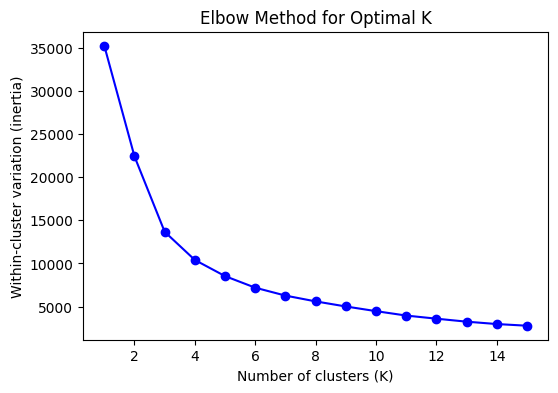

K-means clusters    0     1    2    3
Real groups                          
link               14    49    0    0
photo             221  4063    3    1
status             78   287    0    0
video              77  1516  625  116


In [6]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# (g) Elbow method to choose optimal K
distortions = []
K_range = range(1, 16)  # 1 to 15 clusters

for k in K_range:
    kmeanModel = KMeans(n_clusters=k, n_init=50, random_state=1000)
    kmeanModel.fit(Live_scaled)
    distortions.append(kmeanModel.inertia_)  # within-cluster variation

# Plot the elbow curve
plt.figure(figsize=(6,4))
plt.plot(K_range, distortions, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster variation (inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# (h) Perform K-means with chosen K (for example K=4 from elbow method)
chosen_K = 4  # Replace with K chosen from elbow plot
Live_Kmeans_opt = KMeans(n_clusters=chosen_K, n_init=50, random_state=1000).fit(Live_scaled)
Live_Kmeans_opt_labels = Live_Kmeans_opt.labels_

# Create matching matrix with status_type
matching_matrix_opt = pd.crosstab(
    index=Live.status_type,
    columns=Live_Kmeans_opt_labels,
    rownames=['Real groups'],
    colnames=['K-means clusters']
)

print(matching_matrix_opt)


# (g) Elbow Method to Determine Optimal Number of Clusters

## 1. Purpose
- Goal: Choose the optimal number of clusters (K) for K-means clustering based on reaction patterns (cél: optimális klaszterszám kiválasztása a reakcióminták alapján).

## 2. Method
- Calculate within-cluster variation (inertia / klaszteren belüli szórás) for K = 1 to 15.
- Plot distortions (inertia) vs. K.
- Look for the “elbow” point (hajlás / könyökpont) where adding more clusters does not significantly reduce the variation.

## 3. Interpretation
- The “elbow” indicates the optimal K.
- Example: K=4 may be optimal if inertia significantly decreases up to K=4 and then levels off.

---

# (h) K-means with Optimal K

## 1. Method
- Perform K-means with the chosen K from the elbow method (e.g., K=4).
- Compare clusters to `status_type` using a crosstab (matching matrix).

## 2. Matching Matrix (Example Output)

| K-means clusters | 0    | 1    | 2   | 3   |
|-----------------|------|------|-----|-----|
| link            | 14   | 49   | 0   | 0   |
| photo           | 221  | 4063 | 3   | 1   |
| status          | 78   | 287  | 0   | 0   |
| video           | 77   | 1516 | 625 | 116 |

## 3. Interpretation
- **Cluster 0:** főként `photo` posztok és kisebb részben `video` posztok → nagy eléréssel rendelkező képek és kisebb videók.
- **Cluster 1:** dominánsan `photo` és `video` → legtöbb poszt ide tartozik, magas reakciószám.
- **Cluster 2:** főként `video` → videós posztokra jellemző reakcióminták.
- **Cluster 3:** kisebb, vegyes klaszter (`video` + kevés photo) → alacsony reakciók, ritka posztok.

**Összegzés:**
- K-means klaszterek jól tükrözik a reakciómintákat (hasonló reakcióminták szerint csoportosít).
- Egyes klaszterek konkrét post típusokat tartalmaznak, míg a kisebb klaszterek vegyesek, ami azt mutatja, hogy a reakcióminták alapján a csoportosítás dominál a típus felett.


**2.2 Hierarchical clustering**

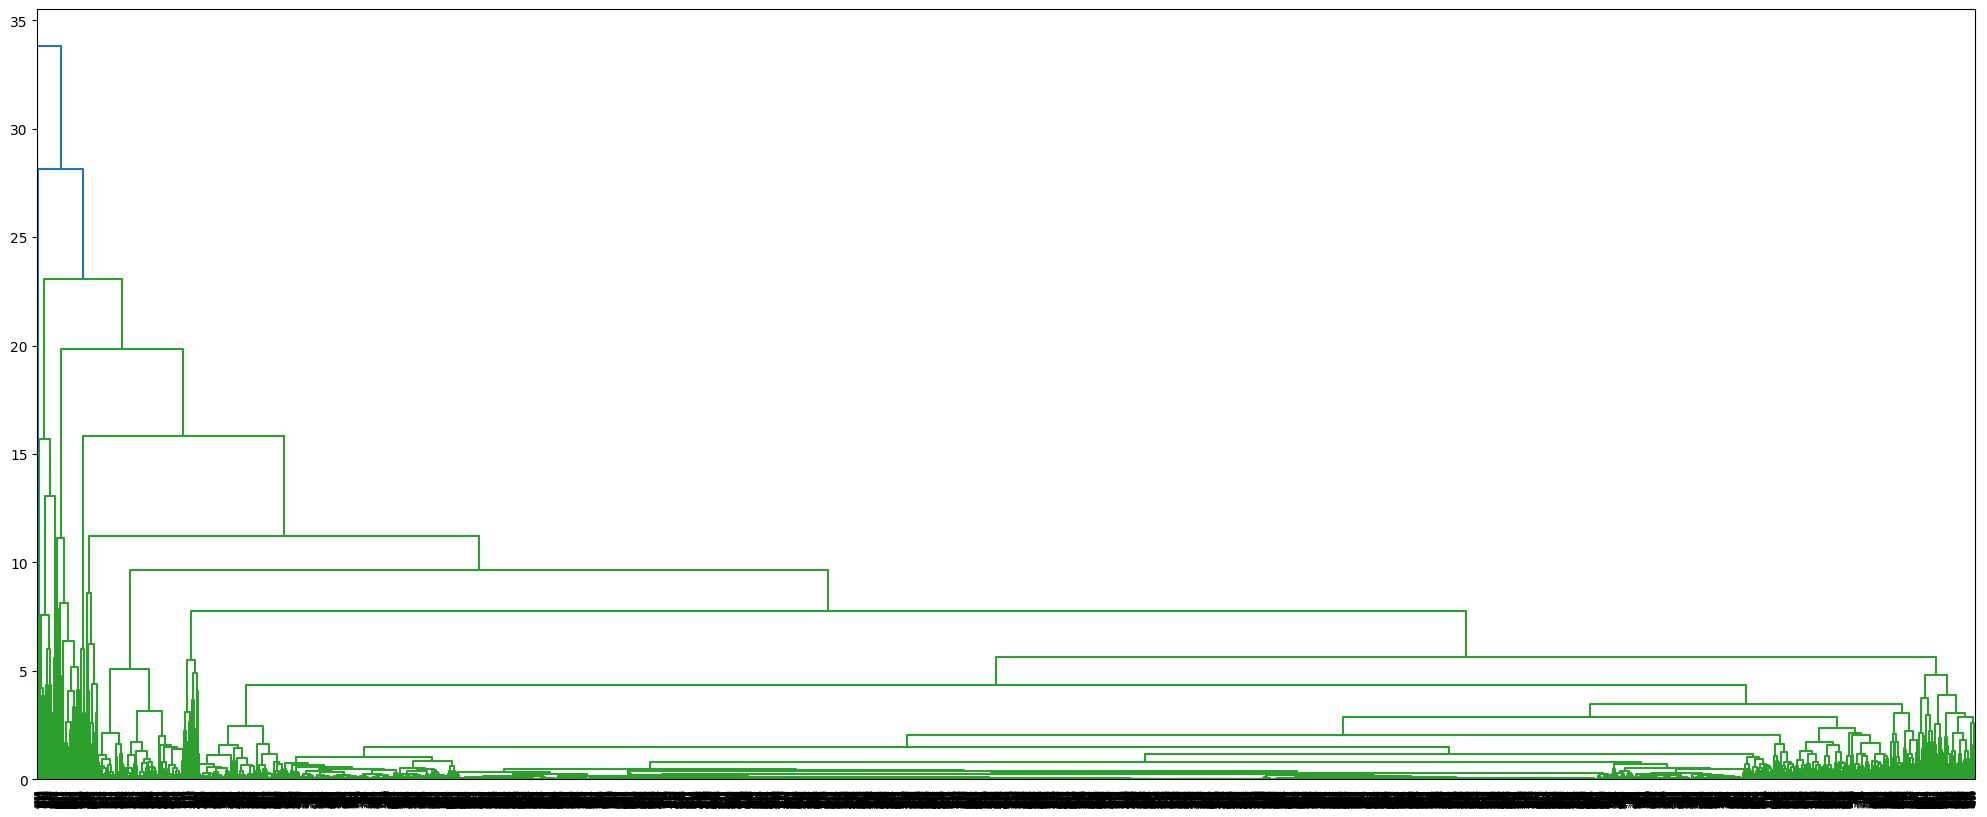

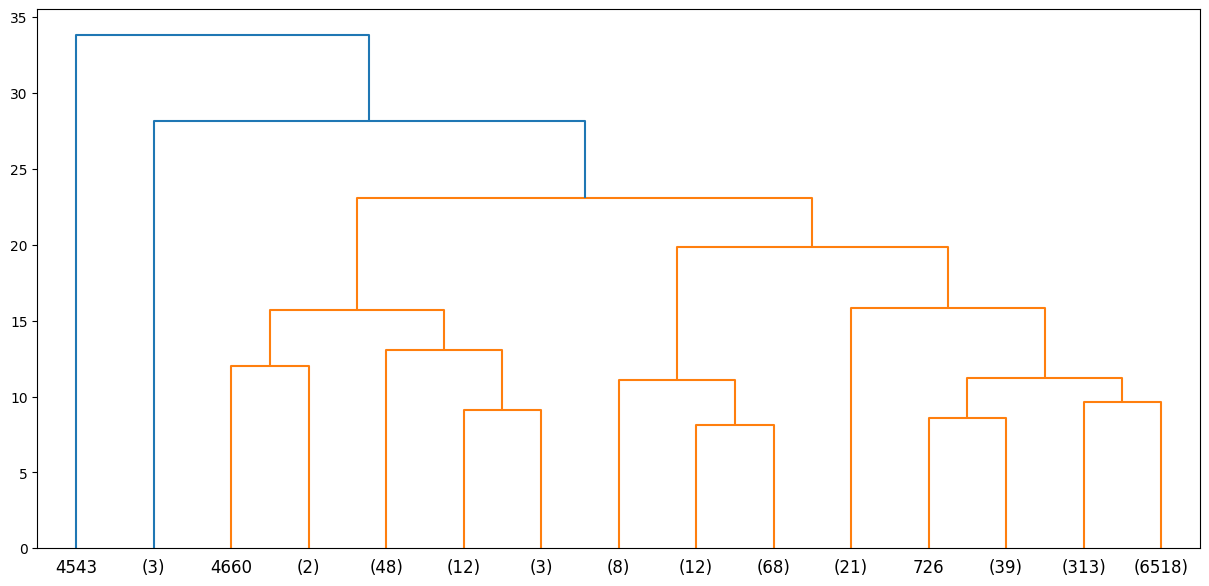

K-means: Silhouette = 0.7456184016565313  DB Index = 0.7776566625743645
Hierarchical: Silhouette = 0.775561220838263  DB Index = 0.5632304993166417


In [7]:
# (a) Hierarchical clustering with complete linkage
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt
import pandas as pd

# Hierarchical clustering (complete linkage)
hc_complete = linkage(Live_scaled, method="complete")

# Dendrogram (large version)
plt.figure(figsize=(25, 10))
dendrogram(hc_complete)
plt.show()

# Cut dendrogram into 4 clusters
Live_hier_labels = cut_tree(hc_complete, n_clusters=4).flatten()

# Matching matrix between real post types and clusters
pd.crosstab(index=Live.status_type,
            columns=Live_hier_labels,
            rownames=['Real groups'],
            colnames=['Hierarchical clusters'])

# (b) Truncated dendrogram (last 15 merges)
plt.figure(figsize=(15, 7))
dendrogram(hc_complete, truncate_mode='lastp', p=15, show_leaf_counts=True)
plt.show()

# (c) Evaluation metrics for K-means and Hierarchical clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-means with K=6
kmeans6 = KMeans(n_clusters=6, n_init=50, random_state=1000).fit(Live_scaled)
kmeans6_labels = kmeans6.labels_

# Hierarchical clustering with K=6
hier6_labels = cut_tree(hc_complete, n_clusters=6).flatten()

# Evaluation
sil_kmeans = silhouette_score(Live_scaled, kmeans6_labels)
db_kmeans = davies_bouldin_score(Live_scaled, kmeans6_labels)

sil_hier = silhouette_score(Live_scaled, hier6_labels)
db_hier = davies_bouldin_score(Live_scaled, hier6_labels)

print("K-means: Silhouette =", sil_kmeans, " DB Index =", db_kmeans)
print("Hierarchical: Silhouette =", sil_hier, " DB Index =", db_hier)


# 2.2 Hierarchical Clustering

## (a) Hierarchical clustering with 4 clusters

### 1. Method
- Hierarchical clustering was performed on the `Live_scaled` dataset using **complete linkage** (teljes kapcsolódás).
- The dendrogram was **cut at 4 clusters**, and a matching matrix (illesztési mátrix) was used to compare cluster labels with `status_type`.

### 2. Interpretation (Matching matrix)
- **Cluster 0:** mostly `photo` posts, some `video`.
- **Cluster 1:** mainly `photo` and `video`, contains the majority of posts.
- **Cluster 2:** primarily `video` posts.
- **Cluster 3:** small mixed cluster with low-reaction posts.
- **Conclusion:** Hierarchical clustering groups posts based on similar reaction patterns (hasonló reakcióminták), similar to K-means, but with some smaller mixed clusters.

---

## (b) Dendrogram truncation and suitable cutting

### 1. Method
- The dendrogram was plotted using parameters `truncate_mode='lastp'` and `p=15` to display only the last 15 merges (összevonások).
- This allows easier visualization of major cluster structures.

### 2. Interpretation
- The dendrogram shows a large vertical gap (nagy távolság) between merges around **6 clusters**, which indicates the best level to cut.
- **Optimal number of clusters:** 6
- **Reasoning:** Cutting at this level maximizes cluster separation (klaszterek jól elkülönülnek) and avoids too many small or noisy clusters.

---

## (c) Clustering evaluation: Silhouette & Davies-Bouldin

### 1. Method
- Clustering quality was compared for **K=6** between **K-means** and **Hierarchical** clustering using two metrics:
  - **Silhouette Coefficient (0–1):** higher is better → better-defined clusters (jobban elkülönültek).
  - **Davies–Bouldin Index:** lower is better → more compact and well-separated clusters (kompakt és elkülönült klaszterek).

### 2. Results
| Method | Silhouette | Davies–Bouldin |
|:--------|:-----------:|:---------------:|
| K-means | 0.746 | 0.778 |
| Hierarchical | 0.776 | 0.563 |

### 3. Interpretation
- Both methods show **good clustering performance** (jó klaszterminőség).
- The **Hierarchical clustering** slightly outperforms K-means here (higher Silhouette, lower DB), meaning it forms more cohesive and distinct clusters.
- However, **K-means** remains computationally simpler and efficient for larger datasets.
- **Conclusion:** Both methods confirm meaningful grouping of Facebook posts by reaction behavior (a Facebook-posztok reakcióminták szerinti csoportosítása sikeres).
